In [2]:
import warnings 
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt 
%config InlineBackend.figure_format = 'retina'

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import (GridSearchCV,StratifiedGroupKFold,cross_val_score)

from sklearn.preprocessing import PolynomialFeatures


In [3]:
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"

# loading data
data = pd.read_csv(
    DATA_PATH+"microchip_tests.txt",
    header=None,
    names=("test1","test2","released")
)

# getting some info about dataframes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   test1     118 non-null    float64
 1   test2     118 non-null    float64
 2   released  118 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.9 KB


In [4]:
data.shape

(118, 3)

In [5]:
data.head()

,test1,test2,released
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [6]:
# Lets seperate features and targets
X = data.iloc[:,:2].values
y = data.iloc[:,2].values

In [7]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

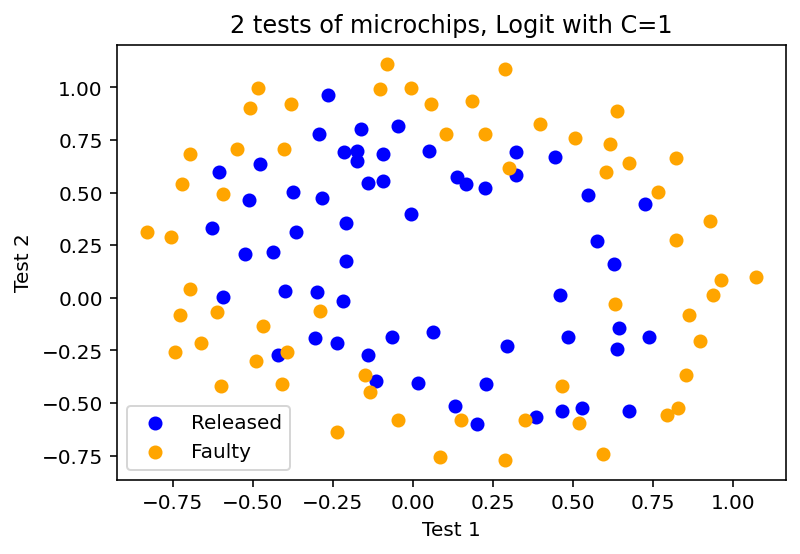

In [13]:
# Lets plot our dataset with scatter plot. As we only have 2 features it would be nice 
# to visualize

# plt.scatter(X[:,0], X[:,1],c=y,cmap='viridis')
plt.scatter(X[y==1,0],X[y==1,1],c="blue",label="Released")
plt.scatter(X[y == 0, 0], X[y == 0, 1], c="orange", label="Faulty")

plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.title("2 tests of microchips, Logit with C=1")
plt.legend();

In [ ]:
# Lets define a function to display the separating curve of the classfier

def plot_boundary(clf,X,y,grid_step=0.01,poly_featurizer=None):
    